# From Coadded Image through Flux Calibration and Radial Profiles #


Using two coadds from 20150418 as a test case:
* NRGs27_R.coadd.fits            
* NRGs27_ha16.coadd.fits




In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

## Flux Calibration ##

Run ZP calibration for R-band image and Halpha image.

use --filter r for the Halpha image - this will find ZP in AB system.

In [6]:
%run ~/github/HalphaImaging/getzp.py --image NRGs27_R.coadd.fits --instrument h --filter R

saturation limit in ADU/s 44.4
sex NRGs27_R.coadd.fits -c default.sex.HDI -CATALOG_NAME NRGs27_R.coadd.cat -MAG_ZEROPOINT 0 -SATUR_LEVEL 44.4444444444
['objID', 'RAJ2000', 'DEJ2000', 'e_RAJ2000', 'e_DEJ2000', 'f_objID', 'Qual', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'ymag', 'e_ymag']


//anaconda/lib/python2.7/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


('number of points retained = ', masked)
new ZP = 0.000, previous ZP = -23.570
('number of points retained = ', 320)
new ZP = -23.570, previous ZP = -23.579
('number of points retained = ', 295)
new ZP = -23.579, previous ZP = -23.576
('number of points retained = ', 270)
new ZP = -23.576, previous ZP = -23.575
('number of points retained = ', 252)
new ZP = -23.575, previous ZP = -23.574
working on this
ZP = 23.574 +/- 0.001


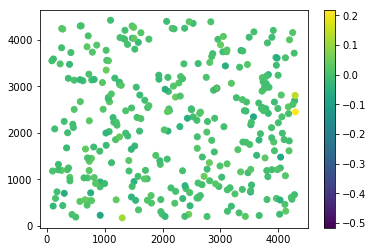

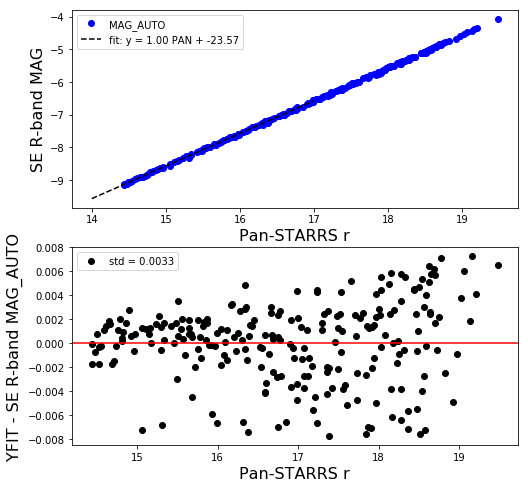

In [7]:
plt.show()

In [8]:
%run ~/github/HalphaImaging/getzp.py --image NRGs27_ha16.coadd.fits --instrument h --filter r

saturation limit in ADU/s 6.7
sex NRGs27_ha16.coadd.fits -c default.sex.HDI -CATALOG_NAME NRGs27_ha16.coadd.cat -MAG_ZEROPOINT 0 -SATUR_LEVEL 6.66666666667
('number of points retained = ', masked)
new ZP = 0.000, previous ZP = -20.326
('number of points retained = ', 274)
new ZP = -20.326, previous ZP = -20.274
('number of points retained = ', 270)
new ZP = -20.274, previous ZP = -20.276
('number of points retained = ', 252)
new ZP = -20.276, previous ZP = -20.276
working on this
ZP = 20.276 +/- 0.004


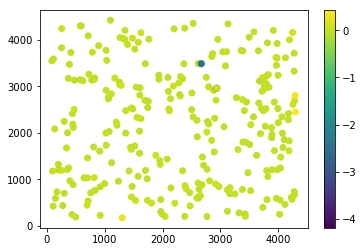

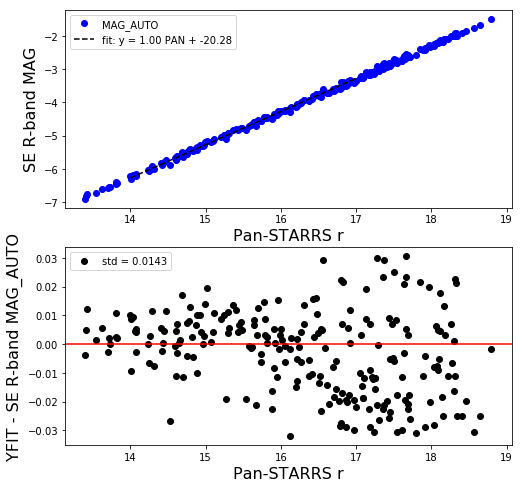

In [9]:
plt.show()

## Find Filter Ratios ##



In [13]:
%run ~/github/HalphaImaging/uat_sextractor_2image.py --image1 NRGs27_R.coadd.fits --image2 NRGs27_ha16.coadd.fits  --plot --imagedir 'plots/'

RUNNING SEXTRACTOR
0.0415 (0.0046)


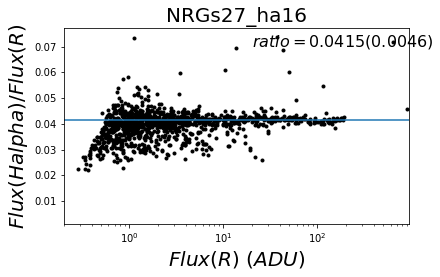

In [14]:
plt.show()


## Subtract Continuum ##



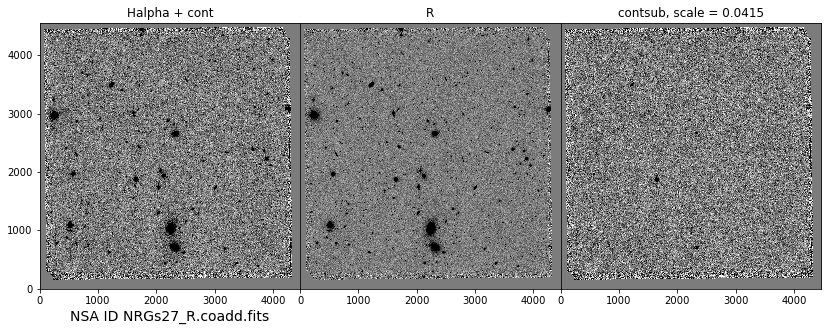

enter new value for scale factor;
   a to adjust contrast percentages(e.g. [.5,98], default is [50,99]). Enter min max.;
   w to write output and quit;
   q to quit without saving
w


In [16]:
%run ~/github/HalphaImaging/uat_subtract_continuum.py --r NRGs27_R.coadd.fits --ha NRGs27_ha16.coadd.fits --scale 0.0415 --mosaic

## Make Cutouts ##

In [17]:
%run ~/github/HalphaImaging/uat_make_cutouts.py --help

usage: uat_make_cutouts.py [-h] [--image IMAGE] [--catalog CATALOG]
                           [--Haimage HAIMAGE] [--filter FILTER]
                           [--nhalpha NHALPHA] [--Rscale SCALE]
                           [--prefix PREFIX] [--plot]

Get cutouts for NSA galaxies within field of view of mosaic and redshift range
of designated H-alpha filter

optional arguments:
  -h, --help         show this help message and exit
  --image IMAGE      mosaic/HDI image to make cutouts from
  --catalog CATALOG  full path to the NSA catalog
  --Haimage HAIMAGE  H-alpha HDI/mosaic image to make cutouts from
  --filter FILTER    Filter for the input mosaic image (e.g. r, R, Ha).
                     Default value is R.
  --nhalpha NHALPHA  H-alpha filter number (e.g. 4, 8, 12 or 16). Default
                     value is 12.
  --Rscale SCALE     cutout size = (scale x Re, scale x Re) - increase scale
                     to increase size of cutout. Default value is 15.
  --prefix PREFIX    c

In [29]:
%run ~/github/HalphaImaging/uat_make_cutouts.py --image NRGs27_R.coadd.fits  --nhalpha 16 --prefix NRGs27 --Rscale 6 --filter R --catalog ~/research/NSA/nsa_v0_1_2.fits 


Galaxies detectable in Halpha have redshifts between  0.0181319518513  and  0.0329117781502
Cutting out NRGs27_R.coadd.fits
number of galaxies to keep =  34


In [28]:
%run ~/github/HalphaImaging/uat_make_cutouts.py --image NRGs27_ha16.coadd.fits  --nhalpha 16 --prefix NRGs27 --Rscale 6 --filter Ha --catalog ~/research/NSA/nsa_v0_1_2.fits 


Galaxies detectable in Halpha have redshifts between  0.0181319518513  and  0.0329117781502
Cutting out NRGs27_ha16.coadd.fits
number of galaxies to keep =  34


In [37]:
%run ~/github/HalphaImaging/uat_make_cutouts.py --image NRGs27-CS.fits  --nhalpha 16 --prefix NRGs27 --Rscale 6 --filter CS --catalog ~/research/NSA/nsa_v0_1_2.fits 

Galaxies detectable in Halpha have redshifts between  0.0181319518513  and  0.0329117781502
Cutting out NRGs27-CS.fits
number of galaxies to keep =  34


## Mask Objects ##

for every cutout (34 in the above example!), you need to make a mask.  The goal is to mask out all objects in the R-band image that are NOT associated with the galaxy.

Can't run this from inside the notebook because it calls ds9 and that doesn't seem to work well.  

In [ ]:
%run ~/github/HalphaImaging/uat_mask.py --R NRGs27-110287-R.fits --Ha 
     ...: NRGs27-110287-Ha.fits

## Add flux conversions to image header ##

In [31]:
%run ~/github/HalphaImaging/fluxcal2header.py --image NRGs27-110287-R.fits --filter R

In [38]:
%run ~/github/HalphaImaging/fluxcal2header.py --image NRGs27-110287-CS.fits --filter ha16

## Subtract Continuum ##

In [33]:
%run ~/github/HalphaImaging/uat_subtract_continuum.py --help

usage: uat_subtract_continuum.py [-h] [--pointing POINTING] [--id ID] [--r R]
                                 [--ha HA] [--scale SCALE] [--mosaic]

This program subtracts scaled R-band image from Halpha.
 
To subtract mosaics:
~/github/HalphaImaging/uat_subtract_continuum.py --r A1367-h02_R.coadd.fits --ha A1367-h02_ha12.coadd.fits --scale 0.0445 --mosaic 

To subtract cutouts:
~/github/HalphaImaging/uat_subtract_continuum.py --cluster A1367 --scale 0.044 --id 113364

optional arguments:
  -h, --help           show this help message and exit
  --pointing POINTING  Cluster prefix of image for continuum subtraction. Use
                       this if you are subtracting continuum from a cutout
                       rather than a mosaic.
  --id ID              NSAID of image for continuum subtraction. Use this if
                       you are subtracting continuum from a cutout rather than
                       a mosaic.
  --r R                R-band image. Use this if you are subtrac

In [35]:
%run ~/github/HalphaImaging/uat_subtract_continuum.py --pointing NRGs27 --scale 0.0415 --id 110287


ValueError: operands could not be broadcast together with shapes (158,158) (157,157) 